In [ ]:
### Stock Market Prediction And Forecasting Using Stacked LSTM

In [64]:
import pandas as pd

In [65]:
df=pd.read_csv('I:\\DSE_STOCKS.csv')

In [66]:
df.head()

,Date,Scrip,Open,High,Low,Close,Volume
0,20230416,00DS30,2201.93174,2203.44690,2199.15020,2199.67374,4696950000
1,20230416,00DSES,1347.51713,1349.54077,1347.26230,1347.69155,4696950000
2,20230416,00DSEX,6215.17968,6222.97687,6213.84157,6216.23281,4696950000
3,20230416,1JANATAMF,6.10000,6.10000,6.10000,6.10000,70
4,20230416,1STPRIMFMF,13.80000,13.80000,13.80000,13.80000,500


In [67]:
df.tail()

,Date,Scrip,Open,High,Low,Close,Volume
316,20230416,WATACHEM,200.2,200.2,200.2,200.2,32
317,20230416,WMSHIPYARD,11.0,11.0,11.0,11.0,550
318,20230416,YPL,16.3,16.3,16.3,16.3,97902
319,20230416,ZAHINTEX,9.0,9.0,9.0,9.0,1505
320,20230416,ZEALBANGLA,129.1,131.6,128.0,129.2,2768


In [68]:
df1=df.reset_index()['High']

In [69]:
df1

0      2203.44690
1      1349.54077
2      6222.97687
3         6.10000
4        13.80000
          ...    
316     200.20000
317      11.00000
318      16.30000
319       9.00000
320     131.60000
Name: High, Length: 321, dtype: float64

In [19]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.Collecting matplotlib
     ---------------------------------------- 7.5/7.5 MB 2.7 MB/s eta 0:00:00
     ---------------------------------------- 2.0/2.0 MB 2.5 MB/s eta 0:00:00
     ---------------------------------------- 55.3/55.3 kB 1.5 MB/s eta 0:00:00
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached pyparsing-3.0.9-py3-none-any.whl (98 kB)
     -------------------------------------- 470.4/470.4 kB 4.9 MB/s eta 0:00:00



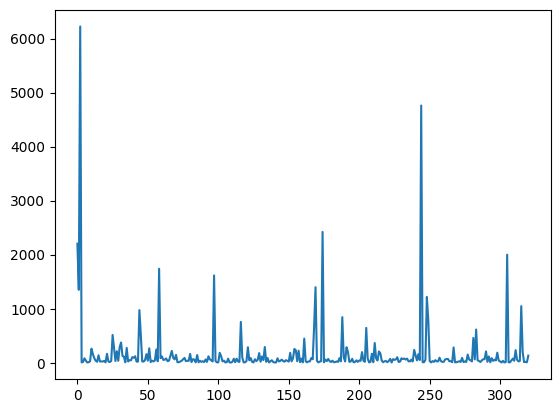

In [70]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [8]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [71]:
import numpy as np

In [72]:
df1

0      2203.44690
1      1349.54077
2      6222.97687
3         6.10000
4        13.80000
          ...    
316     200.20000
317      11.00000
318      16.30000
319       9.00000
320     131.60000
Name: High, Length: 321, dtype: float64

In [49]:
pip install scikit-learn

In [73]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [74]:
df1

array([[3.53563055e-01],
       [2.16234444e-01],
       [1.00000000e+00],
       [1.76906416e-04],
       [1.41525132e-03],
       [1.23834491e-02],
       [5.58059329e-03],
       [3.21648028e-05],
       [7.88037669e-04],
       [3.45771630e-03],
       [4.10422884e-02],
       [2.47347334e-02],
       [1.28659211e-02],
       [4.88905003e-03],
       [2.29978340e-03],
       [2.15343355e-02],
       [2.86266745e-03],
       [3.13606828e-03],
       [2.84658505e-03],
       [4.63173161e-03],
       [3.69895232e-04],
       [2.58926663e-02],
       [2.99132666e-03],
       [1.33483932e-03],
       [4.58348440e-03],
       [8.19880824e-02],
       [4.22967157e-02],
       [4.40657799e-03],
       [3.34996421e-02],
       [5.06595645e-03],
       [4.58026792e-02],
       [5.95048852e-02],
       [1.92506345e-02],
       [1.73689935e-02],
       [5.14636845e-04],
       [4.33259894e-02],
       [3.05565627e-03],
       [7.06017422e-03],
       [6.28821895e-03],
       [1.59537422e-02],


In [75]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [76]:
training_size,test_size

(208, 113)

In [77]:
train_data

array([[3.53563055e-01],
       [2.16234444e-01],
       [1.00000000e+00],
       [1.76906416e-04],
       [1.41525132e-03],
       [1.23834491e-02],
       [5.58059329e-03],
       [3.21648028e-05],
       [7.88037669e-04],
       [3.45771630e-03],
       [4.10422884e-02],
       [2.47347334e-02],
       [1.28659211e-02],
       [4.88905003e-03],
       [2.29978340e-03],
       [2.15343355e-02],
       [2.86266745e-03],
       [3.13606828e-03],
       [2.84658505e-03],
       [4.63173161e-03],
       [3.69895232e-04],
       [2.58926663e-02],
       [2.99132666e-03],
       [1.33483932e-03],
       [4.58348440e-03],
       [8.19880824e-02],
       [4.22967157e-02],
       [4.40657799e-03],
       [3.34996421e-02],
       [5.06595645e-03],
       [4.58026792e-02],
       [5.95048852e-02],
       [1.92506345e-02],
       [1.73689935e-02],
       [5.14636845e-04],
       [4.33259894e-02],
       [3.05565627e-03],
       [7.06017422e-03],
       [6.28821895e-03],
       [1.59537422e-02],


In [78]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [79]:
# reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [80]:
print(X_train.shape), print(y_train.shape)

(107, 100)
(107,)


(None, None)

In [82]:
print(X_test.shape), print(ytest.shape)

(12, 100)
(12,)


(None, None)

In [83]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [48]:
pip install wrapt

Note: you may need to restart the kernel to use updated packages.


In [84]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [85]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [86]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [87]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [106]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
2/2 [==============================] - 0s 152ms/step - loss: 0.0022 - val_loss: 0.0021
Epoch 2/100
2/2 [==============================] - 0s 132ms/step - loss: 0.0023 - val_loss: 0.0021
Epoch 3/100
2/2 [==============================] - 0s 127ms/step - loss: 0.0023 - val_loss: 0.0021
Epoch 4/100
2/2 [==============================] - 0s 131ms/step - loss: 0.0022 - val_loss: 0.0022
Epoch 5/100
2/2 [==============================] - 0s 136ms/step - loss: 0.0023 - val_loss: 0.0022
Epoch 6/100
2/2 [==============================] - 0s 132ms/step - loss: 0.0023 - val_loss: 0.0021
Epoch 7/100
2/2 [==============================] - 0s 127ms/step - loss: 0.0022 - val_loss: 0.0021
Epoch 8/100
2/2 [==============================] - 0s 132ms/step - loss: 0.0022 - val_loss: 0.0022
Epoch 9/100
2/2 [==============================] - 0s 123ms/step - loss: 0.0022 - val_loss: 0.0022
Epoch 10/100
2/2 [==============================] - 0s 129ms/step - loss: 0.0022 - val_loss: 0.0022
Epoch 11/

2/2 [==============================] - 0s 152ms/step - loss: 0.0021 - val_loss: 0.0021
Epoch 84/100
2/2 [==============================] - 0s 127ms/step - loss: 0.0021 - val_loss: 0.0021
Epoch 85/100
2/2 [==============================] - 0s 127ms/step - loss: 0.0021 - val_loss: 0.0022
Epoch 86/100
2/2 [==============================] - 0s 145ms/step - loss: 0.0021 - val_loss: 0.0022
Epoch 87/100
2/2 [==============================] - 0s 136ms/step - loss: 0.0021 - val_loss: 0.0024
Epoch 88/100
2/2 [==============================] - 0s 133ms/step - loss: 0.0021 - val_loss: 0.0023
Epoch 89/100
2/2 [==============================] - 0s 154ms/step - loss: 0.0021 - val_loss: 0.0022
Epoch 90/100
2/2 [==============================] - 0s 146ms/step - loss: 0.0021 - val_loss: 0.0022
Epoch 91/100
2/2 [==============================] - 0s 128ms/step - loss: 0.0021 - val_loss: 0.0022
Epoch 92/100
2/2 [==============================] - 0s 134ms/step - loss: 0.0021 - val_loss: 0.0022
Epoch 93/100


In [107]:
import tensorflow as tf

In [108]:
tf.__version__

'2.12.1'

In [96]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

1/1 [==============================] - 0s 25ms/step


In [109]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [110]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

772735.6324998968

In [111]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

774987.0755732136

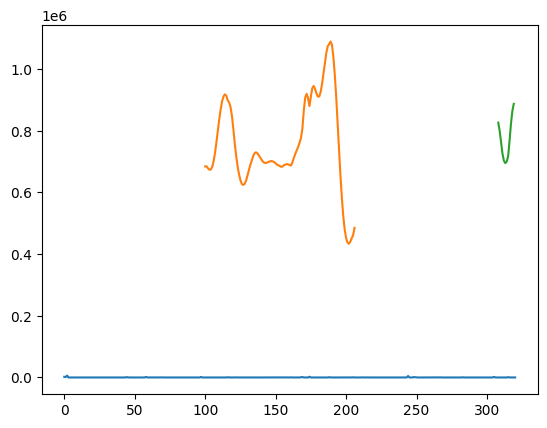

In [124]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [125]:
len(test_data)

113

In [126]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape


(1, 0)

In [127]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [128]:
temp_input

[]

In [129]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

ValueError: cannot reshape array of size 0 into shape (1,100,1)

In [130]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [131]:
import matplotlib.pyplot as plt

In [132]:
len(df1)

321

In [120]:
scaler.inverse_transform(lst_output)

ValueError: Expected 2D array, got 1D array instead:
array=[].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))
plt.savefig('30daypredict.png')

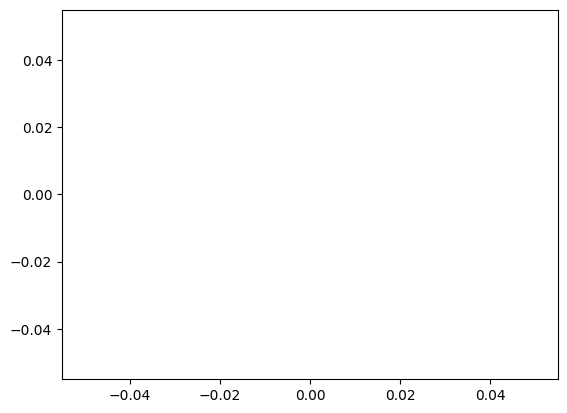

In [121]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [122]:
df3=scaler.inverse_transform(df3).tolist()

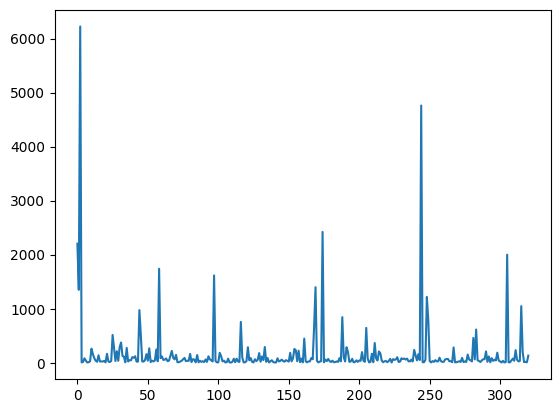

In [123]:
plt.plot(df3)